## Extracción, Tratamiento y Carga de datos (ETL)

### Objetivo

El objetivo de este notebook es realizar un proceso de ETL del archivo JSON "australian_user_reviews". Como primer paso de la Ingeniería de datos, los datos se prepararán y limpiarán para su posterior análisis.

### Archivo de Datos: australian_user_review

El archivo "australian_user_review" contiene información sobre las reseñas de los juegos hecho por los usuarios de la plataforma STEAM (plataforma multinacional de videojuegos). 
La información que nos muestra es: user_id, user_url, reviews.

El detalle de los datos se encuentran en el siguiente [LINK](https://docs.google.com/spreadsheets/d/1y2FbOU9jsJbJkdmBLC7Lr3u576yENh0Z/edit?usp=sharing&ouid=100343940744383618882&rtpof=true&sd=true) con el diccionario de datos del dataset.

### 1. Carga de datos

Librerías

In [135]:
#pip install matplotlib
#pip install seaborn
#pip install langdetect
#pip install nltk

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt 
import seaborn as sns
from langdetect import detect
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
#Descarga el léxico (lexicon) necesario para el análisis de sentimientos VADER.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Angela\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [136]:
# Para visualizar más lineas
# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns', 1000)

Cargamos el archivo json corregido debido a que el archivo original no cumple con el formato de un JSON. El archivo corregido se llama "australian_users_reviews_ok" el cual se utilizará en adelante. El código de corrección es el [siguiente](https://drive.google.com/file/d/1jjw8bmqIoT9cF5Ar1o0jdzfAKlX36CrW/view?usp=sharing), se puede ejecutar (si se desea), pero se trabajará con el archivo ya corregido que se encuentra en el siguiente [link](https://drive.google.com/drive/folders/1PvMb8F0veZYFmmcZytfVBNvmfzi6Rwl9?usp=sharing)

In [137]:
df = pd.read_json('australian_user_reviews_ok.json')
df

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


In [138]:
df.shape

(25799, 3)

El dataframe nos muestra que hay 25799 filas y 3 columnas

### 2. Exploramos el Dataframe

In [139]:
df.columns

Index(['user_id', 'user_url', 'reviews'], dtype='object')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


Del dataframe **df** se observa lo siguiente:

| Variable  | Descripción                                      |
|-----------|-------------------------------------------------------|
| user_id   | Identificador único del usuario                  |
| user_url  | El url del perfil del usuario                         |
| reviews   | Reviews del usuario aparentemente en formato json |

Cada 'review' hecho por un usuario es una lista de diccionarios en formato JSON. Cada elemento de la lista contiene pares clave-valor (como "funny", "posted", "last_edited", "item_id", "helpful", "recommend", y "review") con información de los comentarios realizados por los usuarios. 

Exploremos a más detalle la variable 'reviews'.

In [141]:
# Cargamos el archivo json
archivo_json = 'australian_user_reviews_ok.json' # ruta del archivo

# Abre el archivo en modo lectura con codificación UTF-8
with open(archivo_json, 'r', encoding='utf-8') as file:
    # Carga el contenido del archivo JSON en la variable datos_json
    datos_json = json.load(file)

In [142]:
# Convierte los datos JSON de la columna 'reviews' en un DataFrame plano excepto las columnas 'user_id' y 'user_url'
df_UserReviews = pd.json_normalize(datos_json, record_path=['reviews'], meta=['user_id', 'user_url'])

In [143]:
# Ordena las columnas del dataframe
sorted_columns = ['user_id', 'user_url', 'funny', 'posted', 'last_edited', 'item_id', 'helpful', 'recommend', 'review']
df_UserReviews = df_UserReviews[sorted_columns]

In [144]:
df_UserReviews.head()

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...


In [145]:
df_UserReviews.shape

(59305, 9)

Visualizaremos los datos de las nuevas columnas para saber qué tipo de información contienen. Para lo cual utilizaremos el método **unique()**, este método se aplica a la columna seleccionada y devuelve un array que contiene los valores únicos presentes en esa columna.

In [146]:
df_UserReviews.columns # Imprime las columnas del dataframe

Index(['user_id', 'user_url', 'funny', 'posted', 'last_edited', 'item_id',
       'helpful', 'recommend', 'review'],
      dtype='object')

In [147]:
df_UserReviews['funny'].unique()

array(['', '3 people found this review funny',
       '1 person found this review funny',
       '2 people found this review funny',
       '5 people found this review funny',
       '17 people found this review funny',
       '524 people found this review funny',
       '4 people found this review funny',
       '12 people found this review funny',
       '6 people found this review funny',
       '7 people found this review funny',
       '103 people found this review funny',
       '16 people found this review funny',
       '34 people found this review funny',
       '9 people found this review funny',
       '45 people found this review funny',
       '11 people found this review funny',
       '97 people found this review funny',
       '207 people found this review funny',
       '718 people found this review funny',
       '23 people found this review funny',
       '100 people found this review funny',
       '8 people found this review funny',
       '19 people found this rev

In [148]:
df_UserReviews['posted'].unique()

array(['Posted November 5, 2011.', 'Posted July 15, 2011.',
       'Posted April 21, 2011.', ..., 'Posted February 18, 2013.',
       'Posted November 13, 2012.', 'Posted November 3, 2012.'],
      dtype=object)

In [149]:
df_UserReviews['last_edited'].unique()

array(['', 'Last edited December 5, 2015.',
       'Last edited November 25, 2013.', ...,
       'Last edited April 17, 2014.', 'Last edited May 10, 2014.',
       'Last edited August 15, 2014.'], dtype=object)

In [150]:
df_UserReviews['item_id'].unique()

array(['1250', '22200', '43110', ..., '220090', '262850', '431510'],
      dtype=object)

In [151]:
df_UserReviews['helpful'].unique()

array(['No ratings yet',
       '15 of 20 people (75%) found this review helpful',
       '0 of 1 people (0%) found this review helpful', ...,
       '21 of 34 people (62%) found this review helpful',
       '64 of 73 people (88%) found this review helpful',
       '24 of 34 people (71%) found this review helpful'], dtype=object)

In [152]:
df_UserReviews['recommend'].unique()

array([ True, False])

In [153]:
df_UserReviews['review'].unique()

array(['Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.',
       "It's unique and worth a playthrough.",
       'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!',
       ...,
       'this game is a perfect remake of the original half life. personally one of the best remakes i have played in a long time. there are a few changes in the remake but for the most part its almost the same as the original half life.the game still needs Xen to be completed but all the other chapters are ready for you to play and enjoy. i say buy this game if you loved the original half life. but avoid it if you can t wait for xen to be completed.',
       'had so much fun plaing t

Luego de explorar los valores que contiene las nuevas columnas, se entiende lo siguiente.

Columnas del dataframe **df_UserReviews**:

* user_id: Identificador único del usuario
* user_url: El url del perfil del usuario
    * funny: Indica cuantas personas consideran el 'review' 'funny'
    *  posted: Indica la fecha en la que fue posteado el 'review' 
    * last_edited: Indica la fecha en la cual el 'review' fue editado por última vez por el usuario
    * item_id: Identificador único del 'item' 
    * helpful: Indica cuantas personas consideran el 'review' 'helpful'
    * recommend: Booleano que indica si el 'review' se recomienda
    * review: Comentario del 'review'

In [154]:
df_UserReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      59305 non-null  object
 1   user_url     59305 non-null  object
 2   funny        59305 non-null  object
 3   posted       59305 non-null  object
 4   last_edited  59305 non-null  object
 5   item_id      59305 non-null  object
 6   helpful      59305 non-null  object
 7   recommend    59305 non-null  bool  
 8   review       59305 non-null  object
dtypes: bool(1), object(8)
memory usage: 3.7+ MB


De los datos que tenemos veremos la distribución de la varible 'recommended' que es un booleano

In [155]:
# Contar los valores y calcular el porcentaje
count_values = df_UserReviews['recommend'].value_counts()
percentage_values = df_UserReviews['recommend'].value_counts(normalize=True) * 100
count_values, percentage_values.round(2)

(recommend
 True     52473
 False     6832
 Name: count, dtype: int64,
 recommend
 True     88.48
 False    11.52
 Name: proportion, dtype: float64)

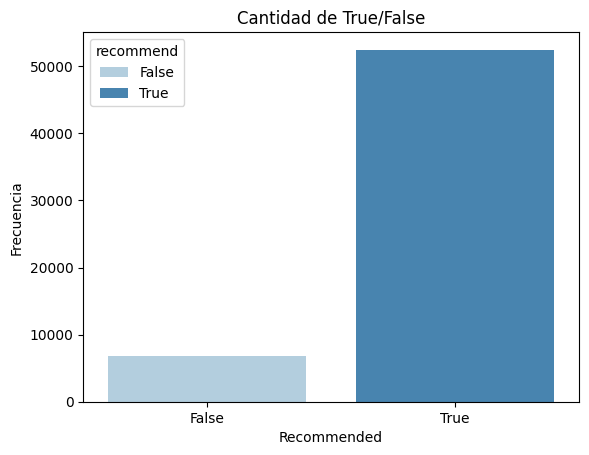

In [156]:
# recommend
sns.countplot(x='recommend', data=df_UserReviews, hue='recommend', palette="Blues")
plt.title('Cantidad de True/False')
plt.xlabel('Recommended')
plt.ylabel('Frecuencia')
plt.show()

Ahora que ya conocemos qué información nos muestra las columnas del dataframe continuaremos con la limpieza y el preprocesamiento. El objetivo es tener lista la data para cualquier proceso analítico que se realice posteriormente.

In [157]:
# En este punto, creamos una copia del dataframe como respaldo para no ejecutar todo 
df_UserRev = df_UserReviews.copy()
#df_UserReviews = df_UserRev.copy()

LIMPIEZA Y PREPROCESAMIENTO DE LOS DATOS

Evaluaremos si las variables son relevantes o si deben ser eliminadas. Primero, se evaluará los nulos de cada columna.

#### 2.1 Identificar y tratar datos nulos

Primero identificamos cuántos datos tienen '', 'null' o 'None' entre sus datos:

In [158]:
total_blanco = (df_UserReviews == '').sum().sum()
# Mostrar los resultados
print("Cantidad de valores blanco ('') en todo el DataFrame:", total_blanco)

total_nulos = (df_UserReviews == 'null').sum().sum()
# Mostrar los resultados
print("Cantidad de valores nulos en todo el DataFrame:", total_nulos)

total_vacios = (df_UserReviews == 'None').sum().sum()
# Mostrar los resultados
print("Cantidad de valores 'None' en todo el DataFrame:", total_vacios)

Cantidad de valores blanco ('') en todo el DataFrame: 104349
Cantidad de valores nulos en todo el DataFrame: 0
Cantidad de valores 'None' en todo el DataFrame: 0


Ahora que ya los identificamos, los reemplazamos por nan

Para crear consistencia de los datos y facilitar su manejo reemplazamos los valores vacios y/o nulos por NaN, de esta forma mantenemos la integridad de los datos al representarlos de una forma estándar.



In [159]:
df_UserReviews.replace(['', 'null', 'None'], np.nan, inplace=True)

In [160]:
# Verifica nulos en el dataframe
df_UserReviews.isnull().sum()

user_id            0
user_url           0
funny          51154
posted             0
last_edited    53165
item_id            0
helpful            0
recommend          0
review            30
dtype: int64

La variable 'funny' tiene 51154 nulos, 'last_edited' tiene 53165 nulos y 'review' tiene 30 nulos. Tanto 'funny' como 'last_edited' tienen un número alto de nulos, podrían ser posibles variables a eliminar, pero veamos primero cuánto representa del total.

#### 2.2. Evaluar columnas a eliminar

Veamos cuánto representan los datos nulos de nuestro dataframe en cada columna

In [161]:
porcentaje_nulos_por_variable = (df_UserReviews.isnull().mean() * 100).round(2)
porcentaje_nulos_por_variable

user_id         0.00
user_url        0.00
funny          86.26
posted          0.00
last_edited    89.65
item_id         0.00
helpful         0.00
recommend       0.00
review          0.05
dtype: float64

Las columnas 'last_edited' y 'funny' se eliminan debido a su alto porcentaje de valores nulos (89% y 86%). La presencia de una cantidad considerable de datos faltantes podría sesgar los resultados y, dado que esas variables no son esenciales para nuestros objetivos analíticos, su eliminación simplifica el conjunto de datos sin pérdida sustancial de información relevante.

In [162]:
df_UserReviews = df_UserReviews.drop(['funny','last_edited'], axis=1)
df_UserReviews.shape

(59305, 7)

Si se toma en cuenta la relevancia de las variables, las columnas 'user_url' y 'helpful' no nos brindan información importante para el análisis posterior, se procede con su eliminación 

In [163]:
df_UserReviews = df_UserReviews.drop(['user_url','helpful'], axis=1)
df_UserReviews.shape

(59305, 5)

In [164]:
df_UserReviews.columns

Index(['user_id', 'posted', 'item_id', 'recommend', 'review'], dtype='object')

#### 2.3 Identificar filas duplicadas

In [165]:
# Selecciona las filas duplicadas en el DataFrame
duplicados = df_UserReviews[df_UserReviews.duplicated(keep=False)] #keep=False significa que todas las instancias duplicadas (tanto la primera como las subsiguientes) se marcarán como duplicadas

# Cuenta el número total de filas duplicadas
num_duplicados = duplicados.shape[0]

# Muestra las filas duplicadas junto con las originales
print("Filas duplicadas:")
duplicados

Filas duplicadas:


,user_id,posted,item_id,recommend,review
31,76561198156664158,Posted June 16.,252950,True,love it
115,Rivtex,"Posted December 23, 2015.",298630,True,Its so bosss
278,DieMadchenschanderin,"Posted August 29, 2015.",346110,True,"It's a good game, mechanics seem solid and the..."
279,DieMadchenschanderin,"Posted October 5, 2015.",380770,False,"Well, I don't have much to say about the game...."
280,DieMadchenschanderin,Posted June 29.,454890,True,"It's a pretty good game, not bad for the 49 ce..."
...,...,...,...,...,...
44433,76561198092022514,Posted July 3.,422400,True,Muy entretenido y una coleccion de armas prome...
44434,76561198092022514,Posted June 1.,218620,True,"Tiene una jugabilidad y tematica muy buena :D,..."
44435,76561198092022514,"Posted August 17, 2014.",261820,True,"Buen juego, no importa el desarrrollo que tien..."
44436,76561198092022514,"Posted February 17, 2014.",224260,True,exelente aporte :D¡¡¡ es una buen mod basado e...


Se procede con la eliminación de las filas duplicadas, los duplicados pueden causar inconsistencia en nuestros datos, eliminarlos asegura que utilicemos datos válidos antes de la carga en el contexto de ETL.

In [166]:
# Elimina las filas duplicadas y actualiza el DataFrame
df_UserReviews_without_duplicates = df_UserReviews.drop_duplicates(keep='first')

# Mostrar información sobre la eliminación de duplicados
print("Número de filas antes de eliminar duplicados:", df_UserReviews.shape[0])
print("Número de filas después de eliminar duplicados:", df_UserReviews_without_duplicates.shape[0])


Número de filas antes de eliminar duplicados: 59305
Número de filas después de eliminar duplicados: 58432


Comprobamos que no haya filas duplicadas

In [167]:
# Selecciona las filas duplicadas en el DataFrame
dupli = df_UserReviews_without_duplicates[df_UserReviews_without_duplicates.duplicated(keep=False)] #keep=False significa que todas las instancias duplicadas (tanto la primera como las subsiguientes) se marcarán como duplicadas

# Cuenta el número total de filas duplicadas
num_duplicated = dupli.shape[0]

# Muestra las filas duplicadas junto con las originales
print("Cantidad de filas duplicadas:", num_duplicated)

Cantidad de filas duplicadas: 0


In [168]:
# Cambiamos de nombre el dataframe a 'df_UserReviews'
df_UserReviews = df_UserReviews_without_duplicates.copy() 

#### 2.4. Crear/eliminar columnas

Es necesario tener la información del año de los 'review' para su uso más adelante*. Esta información se encuentra implicitamente dentro de la columna 'posted'. Un ejemplo de cómo se muestra la información dentro de esta columna: 'Posted April 21, 2011.'

*Sustento: Información necesaria para la etapa de la creación de funciones para los endpoints de la API.

Lo que se realiza en este punto, es crear una columna llamada 'year' que contiene solo la información del año. 

In [169]:
df_UserReviews.head(5)

,user_id,posted,item_id,recommend,review
0,76561197970982479,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...
1,76561197970982479,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.
2,76561197970982479,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,"Posted June 24, 2014.",251610,True,I know what you think when you see this title ...
4,js41637,"Posted September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...


Se observa que 'posted' contiene información adicional o caracteres innecesarios que se deben eliminar antes de realizar operaciones adicionales, o su conversion a fecha

In [170]:
# Elimina todas las ocurrencias de "Posted ", comas y puntos 
df_UserReviews['posted2'] = df_UserReviews['posted'].str.replace(r'Posted |,|\.', '', regex=True)

# Convertimos la columna 'posted' a datetime
df_UserReviews['posted2'] = pd.to_datetime(df_UserReviews['posted2'], errors='coerce') # 'coerce': si hay errores en la conversión de algún valor, pandas rellenará ese valor con NaT (Not a Time) en lugar de generar una excepción y detener el proceso

# Creamos la nueva columna 'year'
df_UserReviews['year'] = df_UserReviews['posted2'].dt.year.astype(float)
#df_UserReviews['year'] = df_UserReviews['posted2'].dt.year.astype('Int64')

In [171]:
# Analizamos los nulos

# Filtra el DataFrame para mostrar solo las filas con valores NaT en 'posted'
df_with_NaT = df_UserReviews[df_UserReviews['year'].isna()]

# Cuenta cuántas filas tienen valores NaT en 'posted'
na_count = df_UserReviews['year'].isna().sum()
print(f"Hay {na_count} filas con valor NaT en 'year'")

# Imprime el DataFrame resultante
df_with_NaT.head(2)

Hay 9934 filas con valor NaT en 'year'


,user_id,posted,item_id,recommend,review,posted2,year
6,evcentric,Posted February 3.,248820,True,A suitably punishing roguelike platformer. Wi...,NaT,NaN
27,76561198079601835,Posted May 20.,730,True,ZIKA DO BAILE,NaT,NaN


Se observa que algunos 'posted' no tienen la información de año en su estructura lo que genera nulos en la columna 'year'

In [172]:
# Contabilizando nulos en year

null_before_imputation=df_UserReviews['year'].isnull().sum()
non_null_before_imputation=df_UserReviews['year'].count()

# Porcentaje de nulos en columna year
total=null_before_imputation+non_null_before_imputation
per_no_nulos=null_before_imputation/total

porcentaje = per_no_nulos * 100

print(f"{porcentaje:.2f}%")

17.00%


**Método de imputación:** Se decide imputar los años faltantes reemplazandolos por la mediana agrupando previamente por item_id. Se agrupa por 'item_id' para considerar las fechas actuales y así estimar un valor dentro de ese conjunto de datos que ya se conocen.  

Imputamos valores

In [173]:
# Agrupamos por 'item_id' y reemplazamos los valores NaN con la mediana del grupo
df_UserReviews['year'] = df_UserReviews.groupby('item_id')['year'].transform(lambda x: x.fillna(x.median(skipna=True))) #skipna=true ignora advertencias que se genera por tratar de caluclar la mediana de un conjunto de datos que está vacío o consiste solo en valores NaN. 

# Redondear y convertir a tipo entero 
df_UserReviews['year'] = df_UserReviews['year'].round().astype('Int64', errors='ignore')

c:\Users\Angela\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Angela\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Angela\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Angela\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Angela\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Us

c:\Users\Angela\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Angela\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Angela\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Angela\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Angela\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Us

In [174]:
# Porcentaje de nulos en columna year
null_after_imputation=df_UserReviews['year'].isnull().sum()
non_null_after_imputation=df_UserReviews['year'].count()
total=null_after_imputation+non_null_after_imputation
per_no_nulos=null_after_imputation/total

porcentaje = per_no_nulos * 100

print(f"{porcentaje:.2f}%")

4.25%


Aún hay nulos en la columna 'year' pero es mucho menor, ahora representa el 4% de nuestros datos. 

In [175]:
# Los item_id que solo tienen nulos se reemplaza por la mediana global

df_UserReviews['year'] = df_UserReviews['year'].fillna(df_UserReviews['year'].median())

In [176]:
null_after_imputation=df_UserReviews['year'].isnull().sum()
non_null_after_imputation=df_UserReviews['year'].count()

print("Cantidad de nulos:",null_before_imputation)
print("Cantidad de no nulos:",non_null_before_imputation)
print("Cantidad de nulos luego de imputar valores:",null_after_imputation)
print("Cantidad de no nulos luego de imputar valores:",non_null_after_imputation)

Cantidad de nulos: 9934
Cantidad de no nulos: 48498
Cantidad de nulos luego de imputar valores: 0
Cantidad de no nulos luego de imputar valores: 58432


Eliminamos las columnas que ya no nos sirven

In [177]:
df_UserReviews = df_UserReviews.drop(['posted2','posted'], axis=1)
df_UserReviews.shape

(58432, 5)

In [178]:
df_UserReviews.head()

,user_id,item_id,recommend,review,year
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,2011
1,76561197970982479,22200,True,It's unique and worth a playthrough.,2011
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,2011
3,js41637,251610,True,I know what you think when you see this title ...,2014
4,js41637,227300,True,For a simple (it's actually not all that simpl...,2013


In [197]:
df_2_5=df_UserReviews.copy()
#df_UserReviews=df_2_5.copy()


### **2.5 Feature Engineering** 

Antes de hacer el *Sentiment Analysis* sobre la columna 'review' con  procesamiento de lenguaje natural (NLP) se va a detectar el idioma de las reseñas. 
Hay 2 razones por las que se realiza este paso:
1. Se sabe que la plataforma STEM es multinacional, por ende pueden haber reseñas (reviews) de usuarios en el lenguaje de su región. El idioma de un texto no se conoce de antemano.
2. Trabajo esencial para garantizar la precisión de las operaciones subsiguientes. Diferentes idiomas poseen características gramaticales únicas, lo que implica la necesidad de enfoques de preprocesamiento específicos.

LangDetect : Librería que detecta 55 idiomas.

In [200]:
def detect_language(texto):
    """
    Detects the language of the input text using the langdetect library.

    Parameters:
    - text (str): The input text to determine the language.

    Returns:
    - str or None: The detected language code (e.g., 'en' for English) or None if detection fails.
    """
    try:
        idioma = detect(texto)
        return idioma
    except:
        # En caso de error en la detección, se opta por colocarle none.
        return None

In [201]:
# Puede demorar en ejecutar (5 min aprox.)

# Aplica la función 'detect_language' a la columna 'review' del dataframe
df_UserReviews['language'] = df_UserReviews['review'].apply(detect_language)

In [202]:
df_UserReviews.head()

,user_id,item_id,recommend,review,year,language
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,2011,en
1,76561197970982479,22200,True,It's unique and worth a playthrough.,2011,en
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,2011,en
3,js41637,251610,True,I know what you think when you see this title ...,2014,en
4,js41637,227300,True,For a simple (it's actually not all that simpl...,2013,en


Actualizamos los nombres

In [203]:
# Se crea un diccionario que mapee los códigos de idioma a los nombres completos y 
# luego usa el método map de Pandas

new_language = {
    'en': 'English',
    'pt': 'Portuguese',
    'es': 'Spanish',
    'de': 'German',
    'so': 'Somali',
    'af': 'Afrikaans',
    'th': 'Thai',
    'tl': 'Tagalog',
    'cy': 'Welsh',
    'da': 'Danish',
    'no': 'Norwegian',
    'nl': 'Dutch',
    'ca': 'Catalan',
    'it': 'Italian',
    'ro': 'Romanian',
    'pl': 'Polish',
    'ko': 'Korean',
    'id': 'Indonesian',
    'fr': 'French',
    'ru': 'Russian',
    'zh-cn': 'Chinese (Simplified)',
    'sw': 'Swahili',
    'et': 'Estonian',
    'tr': 'Turkish',
    'sl': 'Slovenian',
    'hr': 'Croatian',
    'vi': 'Vietnamese',
    'sq': 'Albanian',
    'fi': 'Finnish',
    'hu': 'Hungarian',
    'sv': 'Swedish',
    'sk': 'Slovak',
    'cs': 'Czech',
    'lt': 'Lithuanian',
    'ja': 'Japanese',
    'lv': 'Latvian',
    'bg': 'Bulgarian',
    'uk': 'Ukrainian',
    'zh-tw': 'Chinese (Traditional)',
    'mk': 'Macedonian',
    'ar': 'Arabic',
    'ta': 'Tamil'
}

# Agrega una columna con los nombres completos
df_UserReviews['language2'] = df_UserReviews['language'].map(new_language)

In [204]:
# Obtenemos el conteo de cada idioma y el porcentaje
idioma_counts = df_UserReviews['language2'].value_counts()
idioma_percentages = (idioma_counts / len(df_UserReviews)) * 100

# Crea un nuevo DataFrame con los resultados
resultados_df = pd.DataFrame({
    'Language': idioma_counts.index,
    'Count': idioma_counts.values,
    'Percentage(%)': idioma_percentages.values.round(3)
})

# Ordena por porcentaje de mayor a menor
resultados_df = resultados_df.sort_values(by='Percentage(%)', ascending=False)

# Guarda el dataframe para facilitar análisis en el EDA posterior
resultados_df.to_csv('language_user_reviews.csv', index=False)

resultados_df

,Language,Count,Percentage(%)
0,English,45098,77.180
1,Portuguese,2155,3.688
2,Spanish,1252,2.143
3,German,1143,1.956
4,Somali,995,1.703
5,Afrikaans,745,1.275
6,Thai,708,1.212
7,Tagalog,567,0.970
8,Welsh,450,0.770
9,Danish,402,0.688


In [205]:
# Filtra solo los registros donde language es idioma ingles 'English' que es el idioma en el que trabajaremos y porque representa la mayor parte.
df_UserReviews = df_UserReviews[df_UserReviews['language2'] == 'English']

# Elimina columna language2
df_UserReviews = df_UserReviews.drop('language2', axis=1)

In [207]:
print(df_UserReviews.shape)
df_UserReviews.head()

(45098, 6)


,user_id,item_id,recommend,review,year,language
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,2011,en
1,76561197970982479,22200,True,It's unique and worth a playthrough.,2011,en
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,2011,en
3,js41637,251610,True,I know what you think when you see this title ...,2014,en
4,js41637,227300,True,For a simple (it's actually not all that simpl...,2013,en


In [261]:
df_bef_sentiment=df_UserReviews.copy()
#df_UserReviews=df_bef_sentiment.copy()


Ahora sí, procedemos a realizar el análisis de sentimientos. Para esta etapa se crea una nueva columna **sentiment_analysis** a partir de la columna 'review' aplicando análisis de sentimiento con NLP. Se considera lo siguiente: 
* Debe tomar el valor '0' si es negative, '1' si es neutral y '2' si es positive. 
* De no ser posible este análisis por estar ausente la reseña escrita, tomará el valor de 1.

Normalizamos

In [263]:
import re
sentence_list = []

# Elimina los caracteres que no sean letras 
for sentence in df_UserReviews.review: # Usa el módulo 're' para eliminar todos lo caracteres que no sean letras (mayusculas o minusculas).
    sentence = re.sub("[^a-zA-Z\s]",'', str(sentence))
    # Pasamos a minúsculas
    sentence=sentence.lower()
    # Agregamos el 'review' procesado a la lista
    sentence_list.append(sentence)

# Asigna a una columna en el dataframe
df_UserReviews['review_norm'] = sentence_list

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Angela\AppData\Local\Temp\ipykernel_36836\2930862294.py:6: SyntaxWarning: invalid escape sequence '\s'
  sentence = re.sub("[^a-zA-Z\s]",'', str(sentence))


In [262]:
df_UserReviews.head(2)

,user_id,item_id,recommend,review,year,language
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,2011,en
1,76561197970982479,22200,True,It's unique and worth a playthrough.,2011,en


Analisis de sentimiento

La biblioteca que se usa para esta parte es NLTK, específicamente el módulo *SentimentIntensityAnalyzer* de la biblioteca *nltk.sentiment*. Se utiliza el recurso 'vader_lexicon', este recurso se refiere a un diccionario utilizado por la herramienta de análisis de sentimientos VADER (Valence Aware Dictionary and sEntiment Reasoner) en NLTK. Este léxico contiene palabras con sus respectivas puntuaciones de sentimiento, lo que permite a VADER evaluar la polaridad de una oración basándose en la presencia y puntuaciones de estas palabras en el texto.

Sustento: Utiliza las puntuaciones del léxico o diccionario para calcular la puntuación de sentimiento de una oración que es lo que se pide para la variable 'review'. Además, es eficaz para detectar la polaridad en expresiones emotivas y enunciados subjetivos.

In [264]:
# Inicializar SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Función para realizar el análisis de sentimientos y asignar categorías
def categorize_sentiment(review):
    # Verifica si la reseña está ausente
    if pd.isnull(review) or not isinstance(review, str):
        return 1  # Valor por defecto si la reseña está ausente
    else:
        # Realiza análisis de sentimientos con SentimentIntensityAnalyzer
        sentiment_score = sia.polarity_scores(review)['compound']
        
        # Asigna categoría según la escala proporcionada
        if sentiment_score < 0:
            return 0  # Negativo
        elif sentiment_score == 0:
            return 1  # Neutral
        else:
            return 2  # Positivo


In [265]:
# Aplicar la función a la columna 'review' y crear una nueva columna 'sentiment_category'
df_UserReviews['sentiment_analysis'] = df_UserReviews['review_norm'].apply(categorize_sentiment)

# Mostrar el DataFrame resultante
df_UserReviews[['review','review_norm','sentiment_analysis']]

,review,sentiment_analysis
0,Simple yet with great replayability. In my opi...,2
1,It's unique and worth a playthrough.,2
2,Great atmosphere. The gunplay can be a bit chu...,2
3,I know what you think when you see this title ...,2
4,For a simple (it's actually not all that simpl...,2
...,...,...
59298,this is a very fun and nice 80s themed shooter...,2
59299,if you liked Half life i would really recommen...,2
59300,a must have classic from steam definitely wort...,2
59301,this game is a perfect remake of the original ...,2


Vemos la distribución de la columna 'sentiment_analysis'

In [268]:
# Cuenta los valores en la columna 'sentiment_analysis'
sentiment_counts = df_UserReviews['sentiment_analysis'].value_counts()

# Calcula el porcentaje de cada categoría
sentiment_percentage = df_UserReviews['sentiment_analysis'].value_counts(normalize=True) * 100

# Verifica si hay valores nulos en la columna 'sentiment_analysis'
null_values = df_UserReviews['sentiment_analysis'].isnull().sum()

# Muestra los resultados
print("Distribución de sentiment_analysis:")
print(sentiment_counts)

print("\nPorcentaje de cada categoría:")
print(sentiment_percentage)

print("\nNúmero de valores nulos en sentiment_analysis:", null_values)


Distribución de sentiment_analysis:
sentiment_analysis
2    31927
0     8482
1     4689
Name: count, dtype: int64

Porcentaje de cada categoría:
sentiment_analysis
2    70.794714
0    18.807929
1    10.397357
Name: proportion, dtype: float64

Número de valores nulos en sentiment_analysis: 0


Borramos columnas sobrantes

In [283]:
df_UserReviews = df_UserReviews.drop(['review', 'review_norm'], axis=1)

In [284]:
df_UserReviews

,user_id,item_id,recommend,year,language,sentiment_analysis
0,76561197970982479,1250,True,2011,en,2
1,76561197970982479,22200,True,2011,en,2
2,76561197970982479,43110,True,2011,en,2
3,js41637,251610,True,2014,en,2
4,js41637,227300,True,2013,en,2
...,...,...,...,...,...,...
59298,76561198312638244,233270,True,2014,en,2
59299,76561198312638244,130,True,2015,en,2
59300,76561198312638244,70,True,2014,en,2
59301,76561198312638244,362890,True,2015,en,2


In [286]:
df_aft_sentim = df_UserReviews.copy()

### 3. Cargar

En este paso se guarda los datos transformados en un formato csv y listos para su posterior análisis o uso.

In [287]:
# Los archivos se almacenan en local 
df_UserReviews.to_csv('user_reviews_final.csv', index=False)